In [22]:
# SOM ( self organizing map ) algoritmos
# algoritmo de agrupamento // não supervisionado

In [23]:
# importando bibliotecas necessárias

import pandas as pd                                       # biblioteca para manipulação de dados
import numpy as np                                        # biblioteca para cálculos matemáticos
from sklearn.preprocessing import MinMaxScaler            # biblioteca para normalização dos dados
from minisom import MiniSom                               # biblioteca para criação do SOM
from pylab import bone, pcolor, colorbar, plot, show      # biblioteca para plotar gráficos

In [24]:
# importação da base de dados

dataset = pd.read_csv('./data/Credit_Card_Applications.csv')

In [25]:
# separando os dados em atributos e classes

X = dataset.iloc[ :, :-1].values
y = dataset.iloc[ :, -1].values

In [26]:
# escalonamento dos dados entre 0 e 1 (normalização)

sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [27]:
# visualização dos dados após o escalonamento

X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [28]:
# criação do objeto SOM
# x e y são as dimensões da matriz do mapa
# input_len é o número de atributos do dataset
# sigma é o tamanho do mapa (raio, a partir do nó central)
# learning_rate é a taxa de aprendizado (quantos pesos são atualizados por iteração)
# random_seed é o valor de semente para o gerador de números aleatórios

som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [29]:
# criação do objeto SOM

som.random_weights_init(X)

In [30]:
# treinamento do modelo

som.train_random(data=X, num_iteration=100)

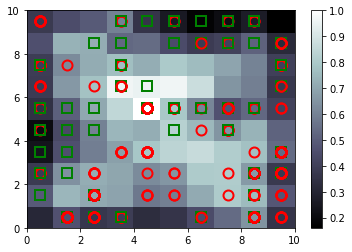

In [32]:
# criação do mapa
bone()
pcolor(som.distance_map().T)
colorbar()

# marcação dos registros no mapa
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

# visualização do mapa
show();

In [33]:
# identificação dos fraudes
mappings = som.win_map(X)

# revertendo a trasnformação de escalonamento para os valores originais
fraudes = np.concatenate((mappings[(8,1)], mappings[(9,2)]), axis=0)
fraudes = sc.inverse_transform(fraudes)

array([[1.5571415e+07, 1.0000000e+00, 3.7580000e+01, 0.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.0000000e+00, 1.8400000e+02, 1.0000000e+00],
       [1.5609070e+07, 1.0000000e+00, 1.8000000e+01, 1.6500000e-01,
        2.0000000e+00, 1.1000000e+01, 7.0000000e+00, 2.1000000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.0000000e+02, 4.1000000e+01],
       [1.5644400e+07, 1.0000000e+00, 3.4580000e+01, 0.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.0000000e+00, 1.8400000e+02, 1.0000000e+00],
       [1.5636626e+07, 1.0000000e+00, 6.2750000e+01, 7.0000000e+00,
        2.0000000e+00, 1.0000000e+01, 9.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [35]:
# visualização dos registros que são fraudes

fraudes

(26, 15)